In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
import color as c

In [113]:
data = pd.read_csv('mil_expend.csv')
data.fillna(0, inplace=True)
data.isna().sum()
data.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,AFG,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [114]:
bric_code = ['BRA', 'CHN', 'EGY', 'RUS', 'ZAF', 'ETH', 'IRN', 'ARE', 'IDN', 'IND']
brics = data[data['Code'].isin(bric_code)]
brics

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,United Arab Emirates,ARE,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.383635e+10,1.750470e+10,1.918176e+10,1.902410e+10,2.356106e+10,2.275507e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
27,Brazil,BRA,Country,Military expenditure (current USD),3.827298e+08,3.423397e+08,3.874490e+08,4.419996e+08,3.542279e+08,6.328690e+08,...,2.564881e+10,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10
38,China,CHN,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.060000e+11,1.160000e+11,1.380000e+11,1.570000e+11,1.800000e+11,2.010000e+11,2.140000e+11,2.160000e+11,2.280000e+11,2.500000e+11
65,Egypt,EGY,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,2.496978e+08,3.357997e+08,4.484996e+08,5.151995e+08,...,4.017404e+09,4.407286e+09,4.463974e+09,4.557749e+09,4.359834e+09,5.085121e+09,5.475491e+09,4.513023e+09,2.765588e+09,3.109998e+09
70,Ethiopia,ETH,Country,Military expenditure (current USD),1.533526e+07,1.855527e+07,2.018539e+07,2.728952e+07,3.614000e+07,4.290000e+07,...,3.396278e+08,3.036170e+08,3.324418e+08,3.665390e+08,3.450642e+08,4.144760e+08,4.425515e+08,4.901772e+08,5.031582e+08,4.966211e+08
104,Indonesia,IDN,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.304459e+09,4.663366e+09,5.838026e+09,6.531098e+09,8.384029e+09,6.929255e+09,7.639095e+09,7.385409e+09,8.178144e+09,7.437197e+09
107,India,IND,Country,Military expenditure (current USD),6.817657e+08,7.483882e+08,1.065436e+09,1.795449e+09,1.986654e+09,2.125990e+09,...,3.872215e+10,4.609045e+10,4.963382e+10,4.721692e+10,4.740353e+10,5.091411e+10,5.129548e+10,5.663762e+10,6.455944e+10,6.651029e+10
110,Iran,IRN,Country,Military expenditure (current USD),9.867987e+07,1.059406e+08,1.099010e+08,1.287129e+08,1.554455e+08,2.000000e+08,...,1.258462e+10,1.356127e+10,1.427767e+10,1.649396e+10,1.199719e+10,9.901105e+09,1.058877e+10,1.226396e+10,1.393120e+10,1.319415e+10
200,Russian Federation,RUS,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.153212e+10,5.872023e+10,7.023752e+10,8.146940e+10,8.835290e+10,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10
261,South Africa,ZAF,Country,Military expenditure (current USD),6.999997e+07,1.137500e+08,1.861999e+08,1.889999e+08,2.715999e+08,2.894499e+08,...,3.592688e+09,4.188168e+09,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09


In [115]:

nato_codes = [
    'ALB', 'BEL', 'BGR', 'CAN', 'HRV', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'ITA', 'LVA',
    'LTU', 'LUX', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'TUR', 'GBR', 'USA'
]
nato_data = data[data['Code'].isin(nato_codes)]
nato_data



,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Albania,ALB,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
15,Belgium,BEL,Country,Military expenditure (current USD),3.832202e+08,3.912188e+08,4.222208e+08,4.446013e+08,4.970592e+08,5.007221e+08,...,5.620670e+09,5.244721e+09,5.499371e+09,5.168998e+09,5.263165e+09,5.191509e+09,4.202063e+09,4.314102e+09,4.484653e+09,4.959692e+09
19,Bulgaria,BGR,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.632542e+08,8.934675e+08,8.290318e+08,8.075293e+08,8.995840e+08,8.357170e+08,6.608479e+08,7.554065e+08,8.241870e+08,1.095591e+09
33,Canada,CAN,Country,Military expenditure (current USD),1.702443e+09,1.677821e+09,1.671314e+09,1.610092e+09,1.657457e+09,1.574705e+09,...,1.893623e+10,1.931569e+10,2.139372e+10,2.045211e+10,1.851573e+10,1.785372e+10,1.793764e+10,1.778278e+10,2.134337e+10,2.162060e+10
52,Czech Republic,CZE,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.718560e+09,2.497903e+09,2.474313e+09,2.220610e+09,2.148784e+09,2.022883e+09,1.779887e+09,1.954935e+09,2.077722e+09,2.710018e+09
53,Germany,DEU,Country,Military expenditure (current USD),2.884518e+09,3.266496e+09,4.308248e+09,4.981004e+09,4.888249e+09,4.978559e+09,...,4.747007e+10,4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.981258e+10,4.157949e+10,4.538172e+10,4.947063e+10
56,Denmark,DNK,Country,Military expenditure (current USD),1.611376e+08,1.708377e+08,2.245502e+08,2.390280e+08,2.553879e+08,2.857912e+08,...,4.337356e+09,4.503492e+09,4.518590e+09,4.422458e+09,4.216648e+09,4.056862e+09,3.364048e+09,3.592728e+09,3.764033e+09,4.228194e+09
68,Spain,ESP,Country,Military expenditure (current USD),2.328398e+08,2.393488e+08,3.087917e+08,3.165203e+08,3.868200e+08,4.394257e+08,...,2.017827e+10,1.971079e+10,1.969544e+10,1.886062e+10,1.724296e+10,1.717855e+10,1.518885e+10,1.401444e+10,1.604353e+10,1.824829e+10
69,Estonia,EST,Country,Military expenditure (current USD),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.343409e+08,3.322312e+08,3.892376e+08,4.368529e+08,4.793145e+08,5.121190e+08,4.635688e+08,4.976534e+08,5.374402e+08,6.184861e+08
73,Finland,FIN,Country,Military expenditure (current USD),8.955762e+07,1.053510e+08,1.544033e+08,1.285765e+08,1.399106e+08,1.495724e+08,...,3.940585e+09,3.717181e+09,4.099506e+09,3.943240e+09,4.161140e+09,3.985508e+09,3.399135e+09,3.415008e+09,3.429968e+09,3.849014e+09


In [116]:
brics_years = brics.drop(['Type','Indicator Name', 'Code', 'Name'], axis=1)
brics_years

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.383635e+10,1.750470e+10,1.918176e+10,1.902410e+10,2.356106e+10,2.275507e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
27,3.827298e+08,3.423397e+08,3.874490e+08,4.419996e+08,3.542279e+08,6.328690e+08,7.182166e+08,7.461392e+08,7.553076e+08,8.166228e+08,...,2.564881e+10,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10
38,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.060000e+11,1.160000e+11,1.380000e+11,1.570000e+11,1.800000e+11,2.010000e+11,2.140000e+11,2.160000e+11,2.280000e+11,2.500000e+11
65,0.000000e+00,0.000000e+00,2.496978e+08,3.357997e+08,4.484996e+08,5.151995e+08,4.818496e+08,5.082995e+08,6.485994e+08,8.889492e+08,...,4.017404e+09,4.407286e+09,4.463974e+09,4.557749e+09,4.359834e+09,5.085121e+09,5.475491e+09,4.513023e+09,2.765588e+09,3.109998e+09
70,1.533526e+07,1.855527e+07,2.018539e+07,2.728952e+07,3.614000e+07,4.290000e+07,4.342000e+07,3.700000e+07,3.466000e+07,3.442000e+07,...,3.396278e+08,3.036170e+08,3.324418e+08,3.665390e+08,3.450642e+08,4.144760e+08,4.425515e+08,4.901772e+08,5.031582e+08,4.966211e+08
104,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.304459e+09,4.663366e+09,5.838026e+09,6.531098e+09,8.384029e+09,6.929255e+09,7.639095e+09,7.385409e+09,8.178144e+09,7.437197e+09
107,6.817657e+08,7.483882e+08,1.065436e+09,1.795449e+09,1.986654e+09,2.125990e+09,1.661155e+09,1.487733e+09,1.586867e+09,1.691433e+09,...,3.872215e+10,4.609045e+10,4.963382e+10,4.721692e+10,4.740353e+10,5.091411e+10,5.129548e+10,5.663762e+10,6.455944e+10,6.651029e+10
110,9.867987e+07,1.059406e+08,1.099010e+08,1.287129e+08,1.554455e+08,2.000000e+08,2.561056e+08,3.310231e+08,4.372937e+08,5.660066e+08,...,1.258462e+10,1.356127e+10,1.427767e+10,1.649396e+10,1.199719e+10,9.901105e+09,1.058877e+10,1.226396e+10,1.393120e+10,1.319415e+10
200,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.153212e+10,5.872023e+10,7.023752e+10,8.146940e+10,8.835290e+10,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10
261,6.999997e+07,1.137500e+08,1.861999e+08,1.889999e+08,2.715999e+08,2.894499e+08,3.244499e+08,3.730999e+08,3.996998e+08,4.255998e+08,...,3.592688e+09,4.188168e+09,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09


In [117]:
year_threshold = 2006
brics_years.columns = brics_years.columns.astype(int)
brics_filtered = brics_years.loc[:, brics_years.columns >= year_threshold]
brics_filtered.insert(0, 'Name', brics['Name'])
brics_sum = brics_filtered.drop('Name', axis=1)
brics_frame = brics_sum.sum().reset_index()
brics_frame = brics_frame.rename(columns={0:'BRICS', 'index': 'Year'}).copy()

In [118]:
nato_years = nato_data.drop(['Type','Indicator Name', 'Code', 'Name'], axis=1)
nato_years

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
15,3.832202e+08,3.912188e+08,4.222208e+08,4.446013e+08,4.970592e+08,5.007221e+08,5.633779e+08,6.079187e+08,6.463811e+08,6.750789e+08,...,5.620670e+09,5.244721e+09,5.499371e+09,5.168998e+09,5.263165e+09,5.191509e+09,4.202063e+09,4.314102e+09,4.484653e+09,4.959692e+09
19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.632542e+08,8.934675e+08,8.290318e+08,8.075293e+08,8.995840e+08,8.357170e+08,6.608479e+08,7.554065e+08,8.241870e+08,1.095591e+09
33,1.702443e+09,1.677821e+09,1.671314e+09,1.610092e+09,1.657457e+09,1.574705e+09,1.614423e+09,1.775500e+09,1.797266e+09,1.770109e+09,...,1.893623e+10,1.931569e+10,2.139372e+10,2.045211e+10,1.851573e+10,1.785372e+10,1.793764e+10,1.778278e+10,2.134337e+10,2.162060e+10
52,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.718560e+09,2.497903e+09,2.474313e+09,2.220610e+09,2.148784e+09,2.022883e+09,1.779887e+09,1.954935e+09,2.077722e+09,2.710018e+09
53,2.884518e+09,3.266496e+09,4.308248e+09,4.981004e+09,4.888249e+09,4.978559e+09,5.063638e+09,5.352122e+09,4.827481e+09,5.471707e+09,...,4.747007e+10,4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.981258e+10,4.157949e+10,4.538172e+10,4.947063e+10
56,1.611376e+08,1.708377e+08,2.245502e+08,2.390280e+08,2.553879e+08,2.857912e+08,3.011377e+08,3.232929e+08,3.454667e+08,3.520000e+08,...,4.337356e+09,4.503492e+09,4.518590e+09,4.422458e+09,4.216648e+09,4.056862e+09,3.364048e+09,3.592728e+09,3.764033e+09,4.228194e+09
68,2.328398e+08,2.393488e+08,3.087917e+08,3.165203e+08,3.868200e+08,4.394257e+08,5.609431e+08,5.459172e+08,6.687536e+08,8.057132e+08,...,2.017827e+10,1.971079e+10,1.969544e+10,1.886062e+10,1.724296e+10,1.717855e+10,1.518885e+10,1.401444e+10,1.604353e+10,1.824829e+10
69,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.343409e+08,3.322312e+08,3.892376e+08,4.368529e+08,4.793145e+08,5.121190e+08,4.635688e+08,4.976534e+08,5.374402e+08,6.184861e+08
73,8.955762e+07,1.053510e+08,1.544033e+08,1.285765e+08,1.399106e+08,1.495724e+08,1.529168e+08,1.466617e+08,1.500600e+08,1.402920e+08,...,3.940585e+09,3.717181e+09,4.099506e+09,3.943240e+09,4.161140e+09,3.985508e+09,3.399135e+09,3.415008e+09,3.429968e+09,3.849014e+09


In [119]:
year_threshold = 2006
nato_years.columns =nato_years.columns.astype(int)
nato_filtered = nato_years.loc[:, nato_years.columns >= year_threshold]
nato_filtered.insert(0, 'Name', nato_data['Name'])
nato_sum = nato_filtered.drop('Name', axis=1)
nato_frame = nato_sum.sum().reset_index()
nato_frame = nato_frame.rename(columns={0:'NATO', 'index': 'Year'}).copy()
nato_frame

,Year,NATO
0,2006,8.144264e+11
1,2007,8.817939e+11
2,2008,9.755368e+11
3,2009,1.004079e+12
4,2010,1.023187e+12
5,2011,1.048734e+12
6,2012,1.003981e+12
7,2013,9.579912e+11
8,2014,9.278826e+11
9,2015,8.757138e+11


In [120]:
nato_frame['BRICS'] = brics_frame['BRICS']
nato_frame

,Year,NATO,BRICS
0,2006,8.144264e+11,1.555452e+11
1,2007,8.817939e+11,1.886205e+11
2,2008,9.755368e+11,2.333410e+11
3,2009,1.004079e+12,2.595782e+11
4,2010,1.023187e+12,2.994420e+11
5,2011,1.048734e+12,3.434956e+11
6,2012,1.003981e+12,3.711364e+11
7,2013,9.579912e+11,4.013966e+11
8,2014,9.278826e+11,4.182477e+11
9,2015,8.757138e+11,3.839667e+11


In [121]:
df_nato_brics = nato_frame.reset_index().melt(id_vars=['Year'], value_vars=nato_frame.columns)
df_nato_brics.columns = ['Year', 'Organization', 'Expenditure']
df_nato_brics

,Year,Organization,Expenditure
0,2006,NATO,8.144264e+11
1,2007,NATO,8.817939e+11
2,2008,NATO,9.755368e+11
3,2009,NATO,1.004079e+12
4,2010,NATO,1.023187e+12
5,2011,NATO,1.048734e+12
6,2012,NATO,1.003981e+12
7,2013,NATO,9.579912e+11
8,2014,NATO,9.278826e+11
9,2015,NATO,8.757138e+11


In [122]:
df_nato_brics['Year'] = pd.to_datetime(df_nato_brics['Year'], format='%Y')
df_nato_brics

,Year,Organization,Expenditure
0,2006-01-01,NATO,8.144264e+11
1,2007-01-01,NATO,8.817939e+11
2,2008-01-01,NATO,9.755368e+11
3,2009-01-01,NATO,1.004079e+12
4,2010-01-01,NATO,1.023187e+12
5,2011-01-01,NATO,1.048734e+12
6,2012-01-01,NATO,1.003981e+12
7,2013-01-01,NATO,9.579912e+11
8,2014-01-01,NATO,9.278826e+11
9,2015-01-01,NATO,8.757138e+11


In [123]:
# nato_join_years = {
#     'ALB': 2009,
#     'BEL': 1949,
#     'BGR': 2004,
#     'CAN': 1949,
#     'HRV': 2009,
#     'CZE': 1999,
#     'DNK': 1949,
#     'EST': 2004,
#     'FIN': 2023,
#     'FRA': 1949,
#     'DEU': 1955,
#     'GRC': 1952,
#     'HUN': 1999,
#     'ISL': 1949,
#     'ITA': 1949,
#     'LVA': 2004,
#     'LTU': 2004,
#     'LUX': 1949,
#     'MNE': 2017,
#     'NLD': 1949,
#     'MKD': 2020,
#     'NOR': 1949,
#     'POL': 1999,
#     'PRT': 1949,
#     'ROU': 2004,
#     'SVK': 2004,
#     'SVN': 2004,
#     'ESP': 1982,
#     'SWE': 2024,
#     'TUR': 1952,
#     'GBR': 1949,
#     'USA': 1949
# }
# brics_join_years = {
#     'BRA': 2006, 
#     'RUS': 2006, 
#     'IND': 2006, 
#     'CHN': 2006,  
#     'ZAF': 2010,  
#     'EGY': 2024,  
#     'ETH': 2024,  
#     'IDN': 2025,  
#     'IRN': 2024, 
#     'ARE': 2024   
# }

In [124]:
nato_T = nato_data.set_index('Code').drop(columns=['Name', 'Type', 'Indicator Name']).T
nato_tot = nato_T.sum(axis=1)
brics_T = brics.set_index('Code').drop(columns=['Name', 'Type', 'Indicator Name']).T
brics_tot = brics_T.sum(axis=1)
brics_tot

df = pd.DataFrame({
    'Date': nato_tot.index,
    'NATO Total': nato_tot.values,
    'BRICS Total': brics_tot.values
})



In [125]:
brics_2006 = brics.copy()

In [126]:
brics_2006 = brics_2006.drop('1960', axis=1)
brics_2006 = brics_2006.drop('1961', axis=1)
brics_2006 = brics_2006.drop('1962', axis=1)
brics_2006 = brics_2006.drop('1963', axis=1)
brics_2006 = brics_2006.drop('1964', axis=1)
brics_2006 = brics_2006.drop('1965', axis=1)
brics_2006 = brics_2006.drop('1966', axis=1)
brics_2006 = brics_2006.drop('1967', axis=1)
brics_2006 = brics_2006.drop('1968', axis=1)
brics_2006 = brics_2006.drop('1969', axis=1)
brics_2006 = brics_2006.drop('1970', axis=1)
brics_2006 = brics_2006.drop('1971', axis=1)
brics_2006 = brics_2006.drop('1972', axis=1)
brics_2006 = brics_2006.drop('1973', axis=1)
brics_2006 = brics_2006.drop('1974', axis=1)
brics_2006 = brics_2006.drop('1975', axis=1)
brics_2006 = brics_2006.drop('1976', axis=1)
brics_2006 = brics_2006.drop('1977', axis=1)
brics_2006 = brics_2006.drop('1978', axis=1)
brics_2006 = brics_2006.drop('1979', axis=1)
brics_2006 = brics_2006.drop('1980', axis=1)
brics_2006 = brics_2006.drop('1981', axis=1)
brics_2006 = brics_2006.drop('1982', axis=1)
brics_2006 = brics_2006.drop('1983', axis=1)
brics_2006 = brics_2006.drop('1984', axis=1)
brics_2006 = brics_2006.drop('1985', axis=1)
brics_2006 = brics_2006.drop('1986', axis=1)
brics_2006 = brics_2006.drop('1987', axis=1)
brics_2006 = brics_2006.drop('1988', axis=1)
brics_2006 = brics_2006.drop('1989', axis=1)
brics_2006 = brics_2006.drop('1990', axis=1)
brics_2006 = brics_2006.drop('1991', axis=1)
brics_2006 = brics_2006.drop('1992', axis=1)
brics_2006 = brics_2006.drop('1993', axis=1)
brics_2006 = brics_2006.drop('1994', axis=1)
brics_2006 = brics_2006.drop('1995', axis=1)
brics_2006 = brics_2006.drop('1996', axis=1)
brics_2006 = brics_2006.drop('1997', axis=1)
brics_2006 = brics_2006.drop('1998', axis=1)
brics_2006 = brics_2006.drop('1999', axis=1)
brics_2006 = brics_2006.drop('2000', axis=1)
brics_2006 = brics_2006.drop('2001', axis=1)
brics_2006 = brics_2006.drop('2002', axis=1)
brics_2006 = brics_2006.drop('2003', axis=1)
brics_2006 = brics_2006.drop('2004', axis=1)
brics_2006 = brics_2006.drop('2005', axis=1)

In [127]:
nato_2006 = nato_data.copy()

In [128]:
nato_2006 = nato_2006.drop('1960', axis=1)
nato_2006 = nato_2006.drop('1961', axis=1)
nato_2006 = nato_2006.drop('1962', axis=1)
nato_2006 = nato_2006.drop('1963', axis=1)
nato_2006 = nato_2006.drop('1964', axis=1)
nato_2006 = nato_2006.drop('1965', axis=1)
nato_2006 = nato_2006.drop('1966', axis=1)
nato_2006 = nato_2006.drop('1967', axis=1)
nato_2006 = nato_2006.drop('1968', axis=1)
nato_2006 = nato_2006.drop('1969', axis=1)
nato_2006 = nato_2006.drop('1970', axis=1)
nato_2006 = nato_2006.drop('1971', axis=1)
nato_2006 = nato_2006.drop('1972', axis=1)
nato_2006 = nato_2006.drop('1973', axis=1)
nato_2006 = nato_2006.drop('1974', axis=1)
nato_2006 = nato_2006.drop('1975', axis=1)
nato_2006 = nato_2006.drop('1976', axis=1)
nato_2006 = nato_2006.drop('1977', axis=1)
nato_2006 = nato_2006.drop('1978', axis=1)
nato_2006 = nato_2006.drop('1979', axis=1)
nato_2006 = nato_2006.drop('1980', axis=1)
nato_2006 = nato_2006.drop('1981', axis=1)
nato_2006 = nato_2006.drop('1982', axis=1)
nato_2006 = nato_2006.drop('1983', axis=1)
nato_2006 = nato_2006.drop('1984', axis=1)
nato_2006 = nato_2006.drop('1985', axis=1)
nato_2006 = nato_2006.drop('1986', axis=1)
nato_2006 = nato_2006.drop('1987', axis=1)
nato_2006 = nato_2006.drop('1988', axis=1)
nato_2006 = nato_2006.drop('1989', axis=1)
nato_2006 = nato_2006.drop('1990', axis=1)
nato_2006 = nato_2006.drop('1991', axis=1)
nato_2006 = nato_2006.drop('1992', axis=1)
nato_2006 = nato_2006.drop('1993', axis=1)
nato_2006 = nato_2006.drop('1994', axis=1)
nato_2006 = nato_2006.drop('1995', axis=1)
nato_2006 = nato_2006.drop('1996', axis=1)
nato_2006 = nato_2006.drop('1997', axis=1)
nato_2006 = nato_2006.drop('1998', axis=1)
nato_2006 = nato_2006.drop('1999', axis=1)
nato_2006 = nato_2006.drop('2000', axis=1)
nato_2006 = nato_2006.drop('2001', axis=1)
nato_2006 = nato_2006.drop('2002', axis=1)
nato_2006 = nato_2006.drop('2003', axis=1)
nato_2006 = nato_2006.drop('2004', axis=1)
nato_2006 = nato_2006.drop('2005', axis=1)

In [129]:
brics_2006['Total Expenditure'] = brics_2006['2006'] + brics_2006['2007'] + brics_2006['2008'] + brics_2006['2009'] + brics_2006['2010'] + brics_2006['2011'] + brics_2006['2012'] + brics_2006['2013'] + brics_2006['2014'] + brics_2006['2015'] + brics_2006['2016'] + brics_2006['2017'] + brics_2006['2018']
brics_2006

,Name,Code,Type,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Expenditure
6,United Arab Emirates,ARE,Country,Military expenditure (current USD),7.165419e+09,8.460994e+09,1.157168e+10,1.383635e+10,1.750470e+10,1.918176e+10,1.902410e+10,2.356106e+10,2.275507e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.430611e+11
27,Brazil,BRA,Country,Military expenditure (current USD),1.640487e+10,2.048576e+10,2.445290e+10,2.564881e+10,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10,3.633448e+11
38,China,CHN,Country,Military expenditure (current USD),5.533749e+10,6.801156e+10,8.636210e+10,1.060000e+11,1.160000e+11,1.380000e+11,1.570000e+11,1.800000e+11,2.010000e+11,2.140000e+11,2.160000e+11,2.280000e+11,2.500000e+11,2.015711e+12
65,Egypt,EGY,Country,Military expenditure (current USD),2.952520e+09,3.306908e+09,3.779880e+09,4.017404e+09,4.407286e+09,4.463974e+09,4.557749e+09,4.359834e+09,5.085121e+09,5.475491e+09,4.513023e+09,2.765588e+09,3.109998e+09,5.279478e+10
70,Ethiopia,ETH,Country,Military expenditure (current USD),3.456870e+08,3.601403e+08,3.881876e+08,3.396278e+08,3.036170e+08,3.324418e+08,3.665390e+08,3.450642e+08,4.144760e+08,4.425515e+08,4.901772e+08,5.031582e+08,4.966211e+08,5.128289e+09
104,Indonesia,IDN,Country,Military expenditure (current USD),2.611875e+09,3.348758e+09,3.232202e+09,3.304459e+09,4.663366e+09,5.838026e+09,6.531098e+09,8.384029e+09,6.929255e+09,7.639095e+09,7.385409e+09,8.178144e+09,7.437197e+09,7.548291e+10
107,India,IND,Country,Military expenditure (current USD),2.395193e+10,2.825477e+10,3.300238e+10,3.872215e+10,4.609045e+10,4.963382e+10,4.721692e+10,4.740353e+10,5.091411e+10,5.129548e+10,5.663762e+10,6.455944e+10,6.651029e+10,6.041929e+11
110,Iran,IRN,Country,Military expenditure (current USD),8.751475e+09,9.330902e+09,1.108195e+10,1.258462e+10,1.356127e+10,1.427767e+10,1.649396e+10,1.199719e+10,9.901105e+09,1.058877e+10,1.226396e+10,1.393120e+10,1.319415e+10,1.579582e+11
200,Russian Federation,RUS,Country,Military expenditure (current USD),3.451778e+10,4.353499e+10,5.618379e+10,5.153212e+10,5.872023e+10,7.023752e+10,8.146940e+10,8.835290e+10,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10,8.328241e+11
261,South Africa,ZAF,Country,Military expenditure (current USD),3.506140e+09,3.525684e+09,3.285925e+09,3.592688e+09,4.188168e+09,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09,4.913047e+10


In [130]:
brics_2006['Total BRICS Expenditure'] = brics_2006['Total Expenditure'].sum()
brics_2006

,Name,Code,Type,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Expenditure,Total BRICS Expenditure
6,United Arab Emirates,ARE,Country,Military expenditure (current USD),7.165419e+09,8.460994e+09,1.157168e+10,1.383635e+10,1.750470e+10,1.918176e+10,1.902410e+10,2.356106e+10,2.275507e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.430611e+11,4.299629e+12
27,Brazil,BRA,Country,Military expenditure (current USD),1.640487e+10,2.048576e+10,2.445290e+10,2.564881e+10,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10,3.633448e+11,4.299629e+12
38,China,CHN,Country,Military expenditure (current USD),5.533749e+10,6.801156e+10,8.636210e+10,1.060000e+11,1.160000e+11,1.380000e+11,1.570000e+11,1.800000e+11,2.010000e+11,2.140000e+11,2.160000e+11,2.280000e+11,2.500000e+11,2.015711e+12,4.299629e+12
65,Egypt,EGY,Country,Military expenditure (current USD),2.952520e+09,3.306908e+09,3.779880e+09,4.017404e+09,4.407286e+09,4.463974e+09,4.557749e+09,4.359834e+09,5.085121e+09,5.475491e+09,4.513023e+09,2.765588e+09,3.109998e+09,5.279478e+10,4.299629e+12
70,Ethiopia,ETH,Country,Military expenditure (current USD),3.456870e+08,3.601403e+08,3.881876e+08,3.396278e+08,3.036170e+08,3.324418e+08,3.665390e+08,3.450642e+08,4.144760e+08,4.425515e+08,4.901772e+08,5.031582e+08,4.966211e+08,5.128289e+09,4.299629e+12
104,Indonesia,IDN,Country,Military expenditure (current USD),2.611875e+09,3.348758e+09,3.232202e+09,3.304459e+09,4.663366e+09,5.838026e+09,6.531098e+09,8.384029e+09,6.929255e+09,7.639095e+09,7.385409e+09,8.178144e+09,7.437197e+09,7.548291e+10,4.299629e+12
107,India,IND,Country,Military expenditure (current USD),2.395193e+10,2.825477e+10,3.300238e+10,3.872215e+10,4.609045e+10,4.963382e+10,4.721692e+10,4.740353e+10,5.091411e+10,5.129548e+10,5.663762e+10,6.455944e+10,6.651029e+10,6.041929e+11,4.299629e+12
110,Iran,IRN,Country,Military expenditure (current USD),8.751475e+09,9.330902e+09,1.108195e+10,1.258462e+10,1.356127e+10,1.427767e+10,1.649396e+10,1.199719e+10,9.901105e+09,1.058877e+10,1.226396e+10,1.393120e+10,1.319415e+10,1.579582e+11,4.299629e+12
200,Russian Federation,RUS,Country,Military expenditure (current USD),3.451778e+10,4.353499e+10,5.618379e+10,5.153212e+10,5.872023e+10,7.023752e+10,8.146940e+10,8.835290e+10,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10,8.328241e+11,4.299629e+12
261,South Africa,ZAF,Country,Military expenditure (current USD),3.506140e+09,3.525684e+09,3.285925e+09,3.592688e+09,4.188168e+09,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09,4.913047e+10,4.299629e+12


In [131]:
nato_2006['Total Expenditure'] = nato_2006['2006']  + nato_2006['2007'] + nato_2006['2008'] + nato_2006['2009'] + nato_2006['2010'] + nato_2006['2011'] + nato_2006['2012'] + nato_2006['2013'] + nato_2006['2014'] + nato_2006['2015'] + nato_2006['2016'] + nato_2006['2017'] + nato_2006['2018']
nato_2006

,Name,Code,Type,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Expenditure
3,Albania,ALB,Country,Military expenditure (current USD),1.409839e+08,1.948403e+08,2.556780e+08,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08,2.286555e+09
15,Belgium,BEL,Country,Military expenditure (current USD),4.307895e+09,5.163980e+09,6.295822e+09,5.620670e+09,5.244721e+09,5.499371e+09,5.168998e+09,5.263165e+09,5.191509e+09,4.202063e+09,4.314102e+09,4.484653e+09,4.959692e+09,6.571664e+10
19,Bulgaria,BGR,Country,Military expenditure (current USD),7.509925e+08,1.032154e+09,1.038052e+09,9.632542e+08,8.934675e+08,8.290318e+08,8.075293e+08,8.995840e+08,8.357170e+08,6.608479e+08,7.554065e+08,8.241870e+08,1.095591e+09,1.138581e+10
33,Canada,CAN,Country,Military expenditure (current USD),1.480989e+10,1.741714e+10,1.934206e+10,1.893623e+10,1.931569e+10,2.139372e+10,2.045211e+10,1.851573e+10,1.785372e+10,1.793764e+10,1.778278e+10,2.134337e+10,2.162060e+10,2.467207e+11
52,Czech Republic,CZE,Country,Military expenditure (current USD),2.449964e+09,2.707678e+09,2.918696e+09,2.718560e+09,2.497903e+09,2.474313e+09,2.220610e+09,2.148784e+09,2.022883e+09,1.779887e+09,1.954935e+09,2.077722e+09,2.710018e+09,3.068195e+10
53,Germany,DEU,Country,Military expenditure (current USD),3.809238e+10,4.255185e+10,4.808144e+10,4.747007e+10,4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.981258e+10,4.157949e+10,4.538172e+10,4.947063e+10,5.853401e+11
56,Denmark,DNK,Country,Military expenditure (current USD),3.896731e+09,4.175653e+09,4.788030e+09,4.337356e+09,4.503492e+09,4.518590e+09,4.422458e+09,4.216648e+09,4.056862e+09,3.364048e+09,3.592728e+09,3.764033e+09,4.228194e+09,5.386482e+10
68,Spain,ESP,Country,Military expenditure (current USD),1.725222e+10,2.006567e+10,2.222772e+10,2.017827e+10,1.971079e+10,1.969544e+10,1.886062e+10,1.724296e+10,1.717855e+10,1.518885e+10,1.401444e+10,1.604353e+10,1.824829e+10,2.359074e+11
69,Estonia,EST,Country,Military expenditure (current USD),3.151791e+08,4.441975e+08,5.057798e+08,4.343409e+08,3.322312e+08,3.892376e+08,4.368529e+08,4.793145e+08,5.121190e+08,4.635688e+08,4.976534e+08,5.374402e+08,6.184861e+08,5.966401e+09
73,Finland,FIN,Country,Military expenditure (current USD),3.128517e+09,3.296558e+09,3.958118e+09,3.940585e+09,3.717181e+09,4.099506e+09,3.943240e+09,4.161140e+09,3.985508e+09,3.399135e+09,3.415008e+09,3.429968e+09,3.849014e+09,4.832348e+10


In [132]:
nato_2006['Total NATO Expenditure'] = nato_2006['Total Expenditure'].sum()
nato_2006

,Name,Code,Type,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Expenditure,Total NATO Expenditure
3,Albania,ALB,Country,Military expenditure (current USD),1.409839e+08,1.948403e+08,2.556780e+08,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08,2.286555e+09,1.227308e+13
15,Belgium,BEL,Country,Military expenditure (current USD),4.307895e+09,5.163980e+09,6.295822e+09,5.620670e+09,5.244721e+09,5.499371e+09,5.168998e+09,5.263165e+09,5.191509e+09,4.202063e+09,4.314102e+09,4.484653e+09,4.959692e+09,6.571664e+10,1.227308e+13
19,Bulgaria,BGR,Country,Military expenditure (current USD),7.509925e+08,1.032154e+09,1.038052e+09,9.632542e+08,8.934675e+08,8.290318e+08,8.075293e+08,8.995840e+08,8.357170e+08,6.608479e+08,7.554065e+08,8.241870e+08,1.095591e+09,1.138581e+10,1.227308e+13
33,Canada,CAN,Country,Military expenditure (current USD),1.480989e+10,1.741714e+10,1.934206e+10,1.893623e+10,1.931569e+10,2.139372e+10,2.045211e+10,1.851573e+10,1.785372e+10,1.793764e+10,1.778278e+10,2.134337e+10,2.162060e+10,2.467207e+11,1.227308e+13
52,Czech Republic,CZE,Country,Military expenditure (current USD),2.449964e+09,2.707678e+09,2.918696e+09,2.718560e+09,2.497903e+09,2.474313e+09,2.220610e+09,2.148784e+09,2.022883e+09,1.779887e+09,1.954935e+09,2.077722e+09,2.710018e+09,3.068195e+10,1.227308e+13
53,Germany,DEU,Country,Military expenditure (current USD),3.809238e+10,4.255185e+10,4.808144e+10,4.747007e+10,4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.981258e+10,4.157949e+10,4.538172e+10,4.947063e+10,5.853401e+11,1.227308e+13
56,Denmark,DNK,Country,Military expenditure (current USD),3.896731e+09,4.175653e+09,4.788030e+09,4.337356e+09,4.503492e+09,4.518590e+09,4.422458e+09,4.216648e+09,4.056862e+09,3.364048e+09,3.592728e+09,3.764033e+09,4.228194e+09,5.386482e+10,1.227308e+13
68,Spain,ESP,Country,Military expenditure (current USD),1.725222e+10,2.006567e+10,2.222772e+10,2.017827e+10,1.971079e+10,1.969544e+10,1.886062e+10,1.724296e+10,1.717855e+10,1.518885e+10,1.401444e+10,1.604353e+10,1.824829e+10,2.359074e+11,1.227308e+13
69,Estonia,EST,Country,Military expenditure (current USD),3.151791e+08,4.441975e+08,5.057798e+08,4.343409e+08,3.322312e+08,3.892376e+08,4.368529e+08,4.793145e+08,5.121190e+08,4.635688e+08,4.976534e+08,5.374402e+08,6.184861e+08,5.966401e+09,1.227308e+13
73,Finland,FIN,Country,Military expenditure (current USD),3.128517e+09,3.296558e+09,3.958118e+09,3.940585e+09,3.717181e+09,4.099506e+09,3.943240e+09,4.161140e+09,3.985508e+09,3.399135e+09,3.415008e+09,3.429968e+09,3.849014e+09,4.832348e+10,1.227308e+13


In [133]:
from prophet import Prophet

# Empty dictionary to store forecast results for each country
forecast_results = {}

# Forecasting for each country
forecast_steps = 3  # Forecast for the next 3 years (2015, 2016, 2017)

for country in df_nato_brics['Organization'].unique():
    # Filter data for the specific country
    country_data = df_nato_brics[df_nato_brics['Organization'] == country][['Year', 'Expenditure']]
    country_data.columns = ['ds', 'y']  # Rename columns to 'ds' and 'y' for Prophet

    # Instantiate and fit the Prophet model
    model = Prophet(yearly_seasonality=False)  # No yearly seasonality as we have yearly data
    model.fit(country_data)

    # Make a dataframe with future dates (forecast_steps years in this case)
    future = model.make_future_dataframe(periods=12, freq='Y')  # Only use periods here

    # Forecast the future values
    forecast = model.predict(future)

    # Store the forecasted values
    forecast_results[country] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Expenditure Forecast for {country}')
    plt.xlabel('Year')
    plt.ylabel('Expenditure')
    plt.show()

# Print forecast results for each country
for country, forecast in forecast_results.items():
    print(f"\nForecast for {country}:")
    print(forecast.tail())

ModuleNotFoundError: No module named 'prophet'

In [134]:
X = df[['NATO Total']]
y = df['BRICS Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Root Mean Squared Error (RMSE): 72980248135.29811
R-squared (R²): 0.7647115867444529


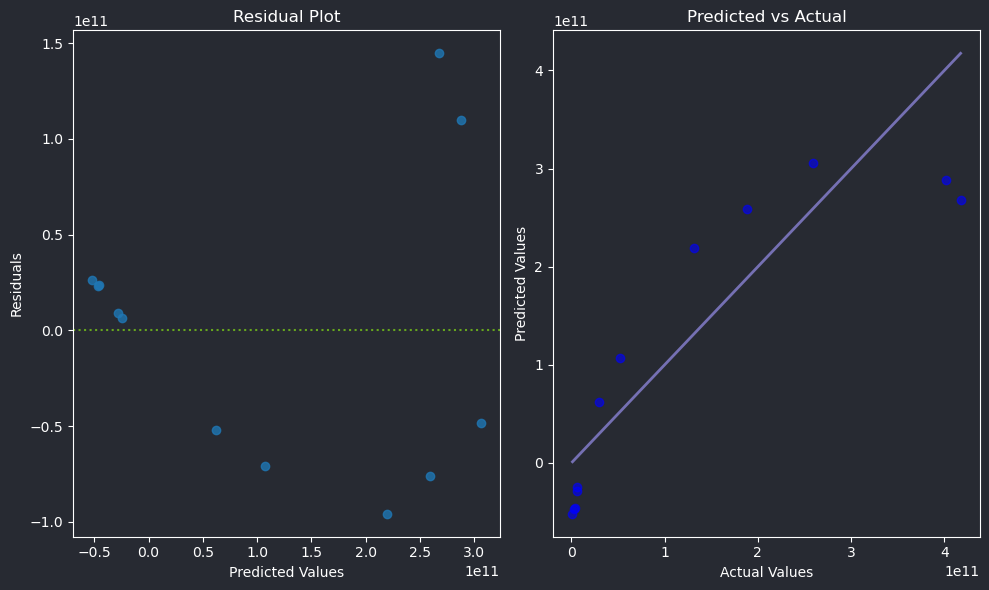

In [137]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
c.customize_graph(plt.gca())

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # 45-degree line
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()

c.customize_graph(plt.gca())
plt.show()

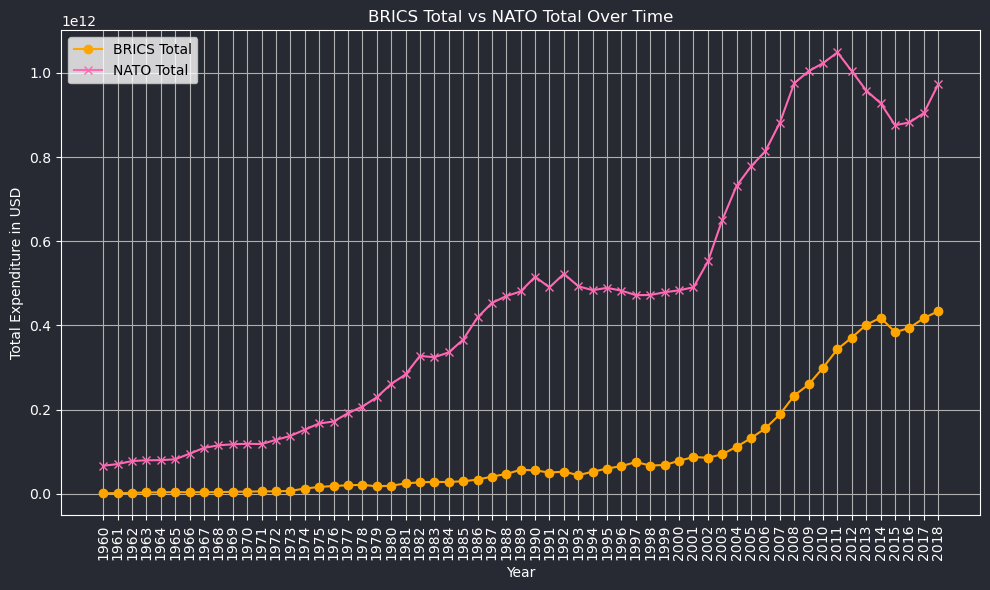

In [138]:
plt.figure(figsize=(10, 6))

plt.title('BRICS Total vs NATO Total Over Time')
plt.xlabel('Year')
plt.ylabel('Total Expenditure in USD')

plt.xticks(rotation = 90)

plt.grid(True)
plt.tight_layout()
c.customize_graph(plt.gca())

plt.plot(df['Date'], df['BRICS Total'], label='BRICS Total', color="orange", marker='o')
plt.plot(df['Date'], df['NATO Total'], label='NATO Total', color="hotpink", marker='x')
plt.legend()

plt.tight_layout()
plt.show()